# This is the data analysis test workbook

Goals include setting up data tables for each type of data

Plotting a line graph of the data

Allowing the person looking at the data to choose which county or country they wish to look at

In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame

In [ ]:
import webbrowser
website ='https://datahub.io/core/covid-19#data'
webbrowser.open(website)

In [2]:
#finds the directory path for the file
dir_path = os.path.dirname(os.path.realpath('countries-aggregated.csv'))
dir_path

'C:\\Users\\User\\Documents\\GitHub\\COVID_Bubble_Estimator'

In [3]:
#Finds all the files in the directory
f = []
for (dirpath, dirnames, filenames) in os.walk(dir_path):
    f.extend(filenames)
    break

In [4]:
f

['.gitignore',
 '.ipynb',
 'countries-aggregated.csv',
 'covid-19-data.html',
 'Crawler.ipynb',
 'Data hub data importer.ipynb',
 'Data hub data importer_OLD.ipynb',
 'Data_Importer.ipynb',
 'Data_Processing.ipynb',
 'key-countries-pivoted.csv',
 'README.md',
 'reference.csv',
 'time-series-19-covid-combined.csv',
 'us_confirmed.csv',
 'us_deaths.csv',
 'us_simplified.csv',
 'worldwide-aggregate.csv',
 '_core_covid-19']

In [5]:
#Makes a list of all the files with the .csv ending
files=[]
for Type in f:
    if Type.endswith('.csv'):
        files.append(Type)

In [6]:
files

['countries-aggregated.csv',
 'key-countries-pivoted.csv',
 'reference.csv',
 'time-series-19-covid-combined.csv',
 'us_confirmed.csv',
 'us_deaths.csv',
 'us_simplified.csv',
 'worldwide-aggregate.csv']

In [7]:
# Makes a list of all the filenames
dfs_names=[]
for x in files:
    n, q =x.split('.')
    dfs_names.append(n)

In [8]:
dfs_names

['countries-aggregated',
 'key-countries-pivoted',
 'reference',
 'time-series-19-covid-combined',
 'us_confirmed',
 'us_deaths',
 'us_simplified',
 'worldwide-aggregate']

In [9]:
# Creats a dictionary with all my .cvs files so that I can analyze it with Pandas
dfs={}
for dfn,file in zip(dfs_names, files):
    dfs[dfn] = pd.read_csv(file)
    print(dfs[dfn].shape)
    print(dfs[dfn].dtypes)
dfs.keys()

(135436, 6)
Unnamed: 0     int64
Date          object
Country       object
Confirmed      int64
Recovered      int64
Deaths         int64
dtype: object
(691, 10)
Unnamed: 0         int64
Date              object
China              int64
US                 int64
United_Kingdom     int64
Italy              int64
France             int64
Germany            int64
Spain              int64
Iran               int64
dtype: object
(4214, 13)
Unnamed: 0          int64
UID                 int64
iso2               object
iso3               object
code3             float64
FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
Combined_Key       object
Population        float64
dtype: object
(193480, 7)
Unnamed: 0          int64
Date               object
Country/Region     object
Province/State     object
Confirmed           int64
Recovered         float64
Deaths              int64
dtype: object
(23

dict_keys(['countries-aggregated', 'key-countries-pivoted', 'reference', 'time-series-19-covid-combined', 'us_confirmed', 'us_deaths', 'us_simplified', 'worldwide-aggregate'])

In [10]:
dfs["us_confirmed"]

,Unnamed: 0,Admin2,Date,Case,Country/Region,Province/State
0,0,Autauga,2020-01-22,0,US,Alabama
1,1,Autauga,2020-01-23,0,US,Alabama
2,2,Autauga,2020-01-24,0,US,Alabama
3,3,Autauga,2020-01-25,0,US,Alabama
4,4,Autauga,2020-01-26,0,US,Alabama
...,...,...,...,...,...,...
2309317,2309317,Weston,2021-12-08,1208,US,Wyoming
2309318,2309318,Weston,2021-12-09,1211,US,Wyoming
2309319,2309319,Weston,2021-12-10,1218,US,Wyoming
2309320,2309320,Weston,2021-12-11,1218,US,Wyoming


In [12]:
# Get the US confirmed cases and make a DataFrame from them
us_confirmed = pd.read_csv('us_confirmed.csv')

In [13]:
# Gets the data from California only
Cal=us_confirmed[us_confirmed['Province/State']=='California']
# Indexes the data by Admin2 (aka cities) and Dates
#This unstacks the cities into their own hirerarchy
dframe=Cal.set_index(['Admin2','Date']).unstack('Admin2')['Case']
dframe

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08,126606,108,5853,25790,4525,3314,104962,3820,18597,158642,...,91587,14753,10355,1026,87470,7857,84,105246,21881,10901
2021-12-09,126607,108,5853,25791,4525,3314,104962,3820,18597,158644,...,92542,14753,10355,1026,87470,7857,81,105247,21881,10901
2021-12-10,126741,109,5859,25830,4539,3314,105074,3831,18636,158802,...,92709,14771,10363,1027,87521,7868,146,105311,21914,10921


<AxesSubplot:title={'center':'California'}, xlabel='Date'>

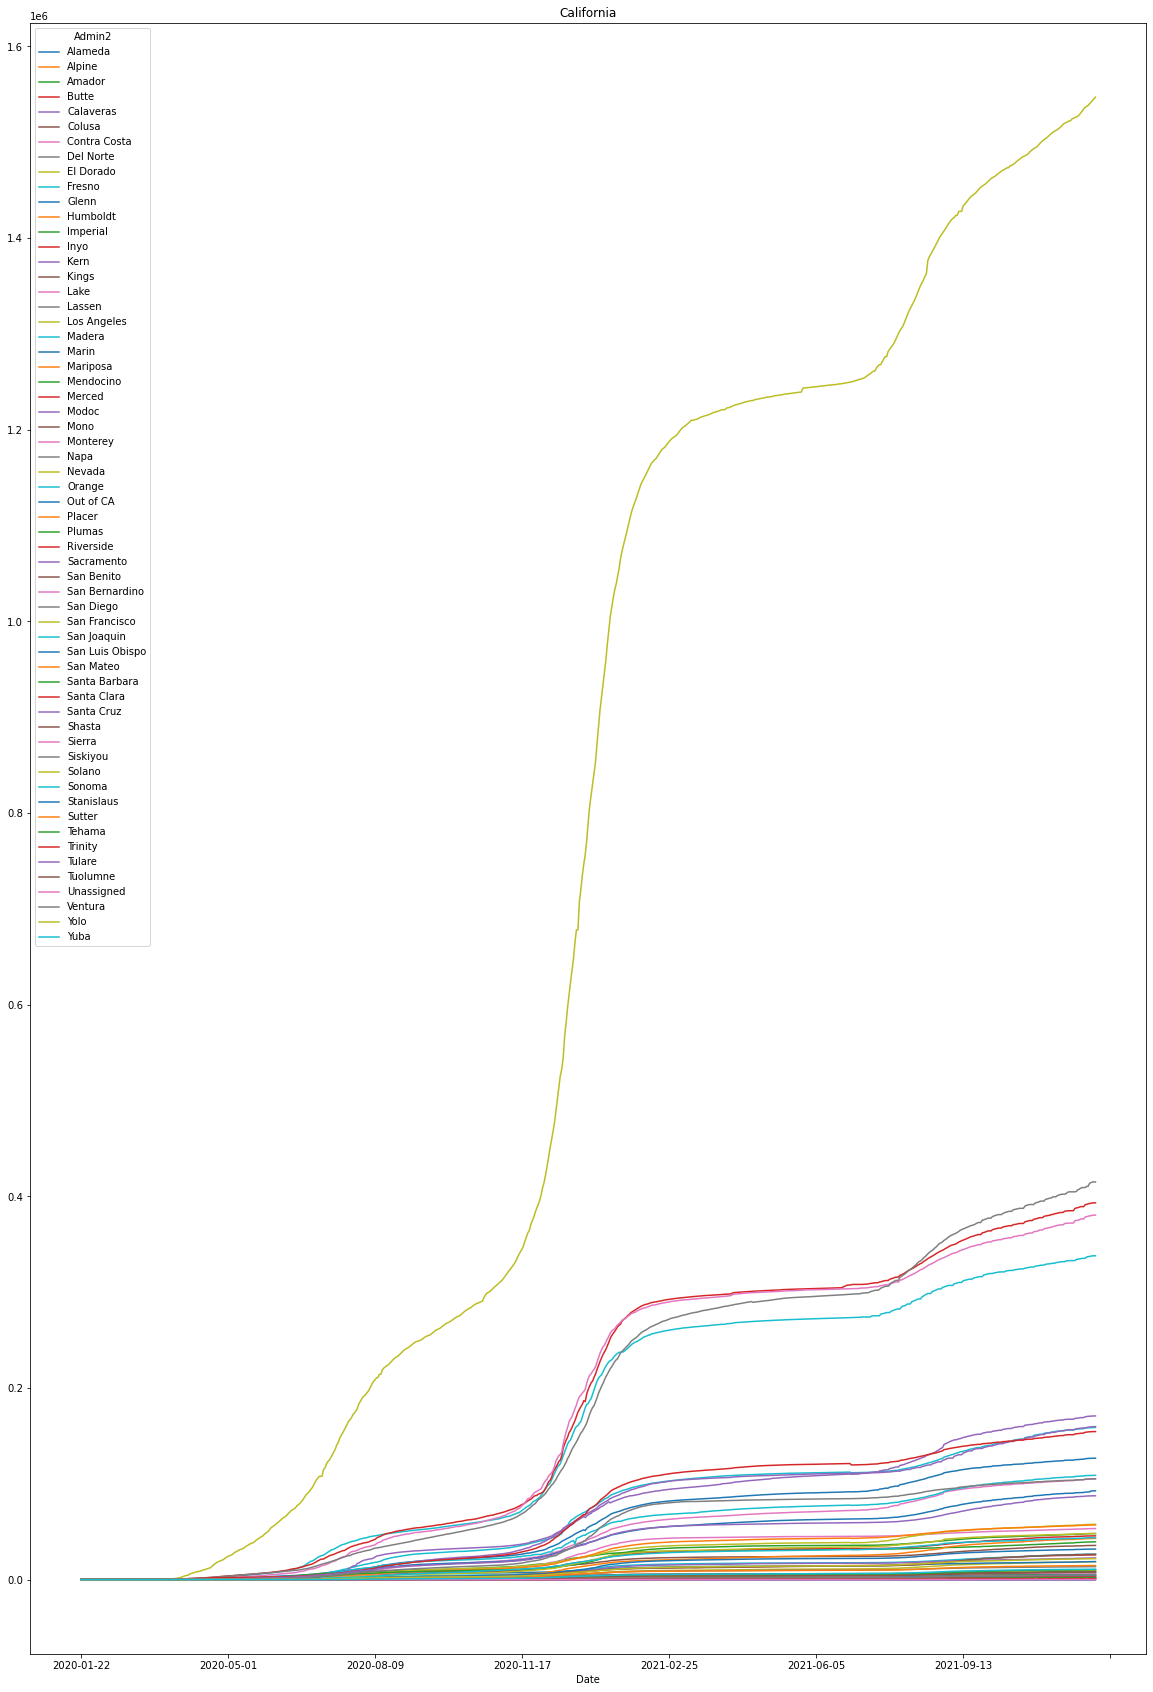

In [14]:
dframe.plot(title=('California'),figsize=(20,30))

In [15]:
dframe.describe()

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,...,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,54968.457308,50.186686,2209.958032,9099.221418,1406.235890,1382.907381,43633.173661,1048.487699,6707.185239,67653.801737,...,38326.151954,5911.204052,3543.945007,288.010130,36666.121563,2607.248915,40.950796,47600.489146,8787.170767,3942.356006
std,45063.900568,43.114087,2076.327313,8386.216085,1393.970577,1159.988013,36716.294431,1214.163116,6346.218913,54796.954214,...,31262.509419,5165.585404,3379.555728,304.604393,29293.194735,2558.997665,76.943009,40847.683752,7552.491034,3616.768956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8095.500000,2.000000,41.000000,353.500000,62.500000,116.000000,4805.000000,59.000000,294.000000,8634.000000,...,5257.500000,370.500000,113.500000,6.000000,5917.500000,56.000000,0.000000,4777.500000,918.000000,191.000000
50%,54669.000000,67.000000,2534.000000,8619.000000,1189.000000,1417.000000,42103.000000,758.000000,6202.000000,72808.000000,...,38592.000000,6603.000000,3416.000000,287.000000,38332.000000,2923.000000,0.000000,43874.000000,8539.000000,3886.000000
75%,91407.000000,89.000000,3777.000000,14611.500000,2213.000000,2298.000000,71892.500000,1426.500000,11178.000000,111840.500000,...,63182.500000,9740.000000,5732.500000,416.500000,59345.000000,4151.000000,44.500000,84446.500000,14528.000000,6317.500000
max,126741.000000,109.000000,5859.000000,25830.000000,4539.000000,3314.000000,105074.000000,3831.000000,18636.000000,158802.000000,...,92709.000000,14771.000000,10363.000000,1027.000000,87521.000000,7868.000000,584.000000,105311.000000,21914.000000,10921.000000


In [16]:
dframe.columns

Index(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles',
       'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono',
       'Monterey', 'Napa', 'Nevada', 'Orange', 'Out of CA', 'Placer', 'Plumas',
       'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego',
       'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo',
       'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra',
       'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama',
       'Trinity', 'Tulare', 'Tuolumne', 'Unassigned', 'Ventura', 'Yolo',
       'Yuba'],
      dtype='object', name='Admin2')

<AxesSubplot:title={'center':'California'}, ylabel='Frequency'>

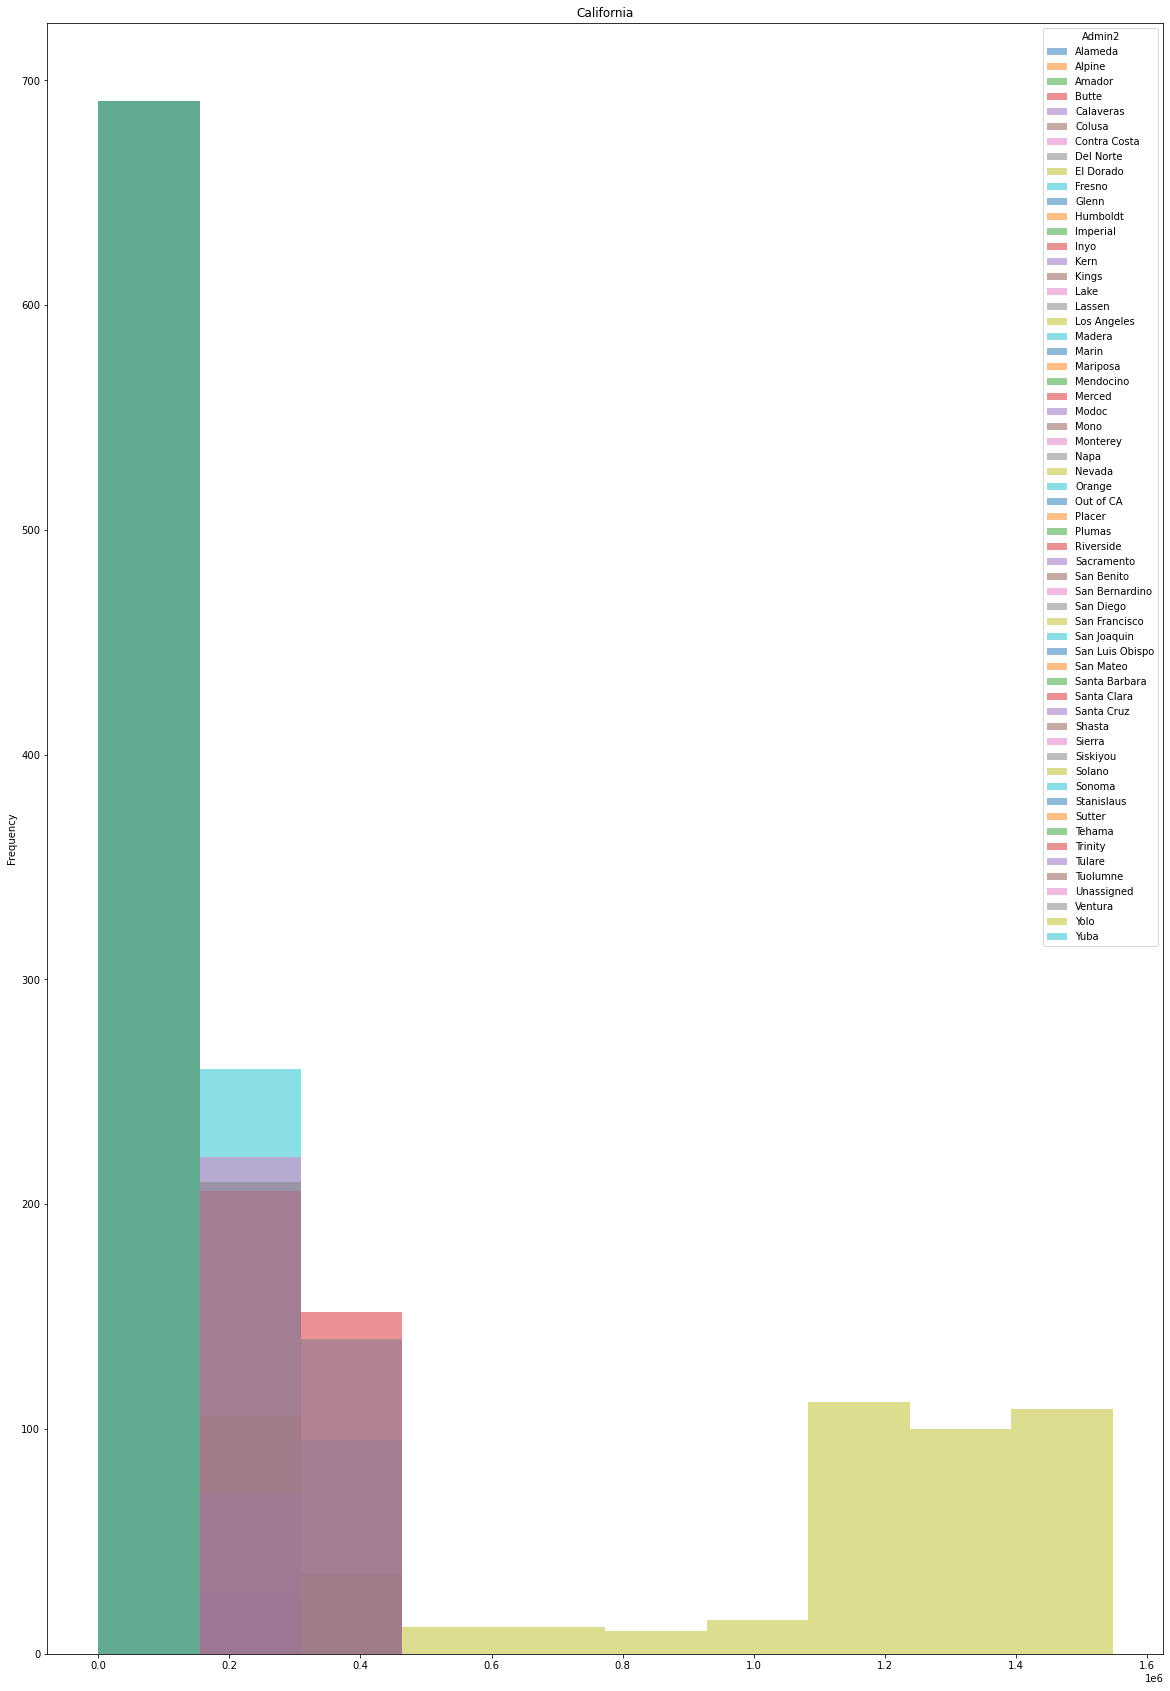

In [18]:
dframe.plot.hist(title=('California'),figsize=(20,30), alpha=0.5)

In [19]:
California_Cities=[]
for i in dframe.columns:
    California_Cities.append(dframe[i])
dframe_Cal=DataFrame(California_Cities)    

In [20]:
dframe_Cal

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12
Alameda,0,0,0,0,0,0,0,0,0,0,...,125657,125663,126260,126395,126493,126606,126607,126741,126741,126741
Alpine,0,0,0,0,0,0,0,0,0,0,...,108,108,108,108,108,108,108,109,109,109
Amador,0,0,0,0,0,0,0,0,0,0,...,5801,5801,5833,5841,5850,5853,5853,5859,5859,5859
Butte,0,0,0,0,0,0,0,0,0,0,...,25638,25640,25725,25742,25771,25790,25791,25830,25830,25830
Calaveras,0,0,0,0,0,0,0,0,0,0,...,4459,4459,4502,4513,4515,4525,4525,4539,4539,4539
Colusa,0,0,0,0,0,0,0,0,0,0,...,3291,3291,3306,3308,3314,3314,3314,3314,3314,3314
Contra Costa,0,0,0,0,0,0,0,0,0,0,...,104269,104274,104706,104783,104877,104962,104962,105074,105074,105074
Del Norte,0,0,0,0,0,0,0,0,0,0,...,3779,3779,3804,3797,3819,3820,3820,3831,3831,3831
El Dorado,0,0,0,0,0,0,0,0,0,0,...,18454,18456,18553,18566,18582,18597,18597,18636,18636,18636
Fresno,0,0,0,0,0,0,0,0,0,0,...,157526,157528,158248,158351,158527,158642,158644,158802,158802,158802


<AxesSubplot:>

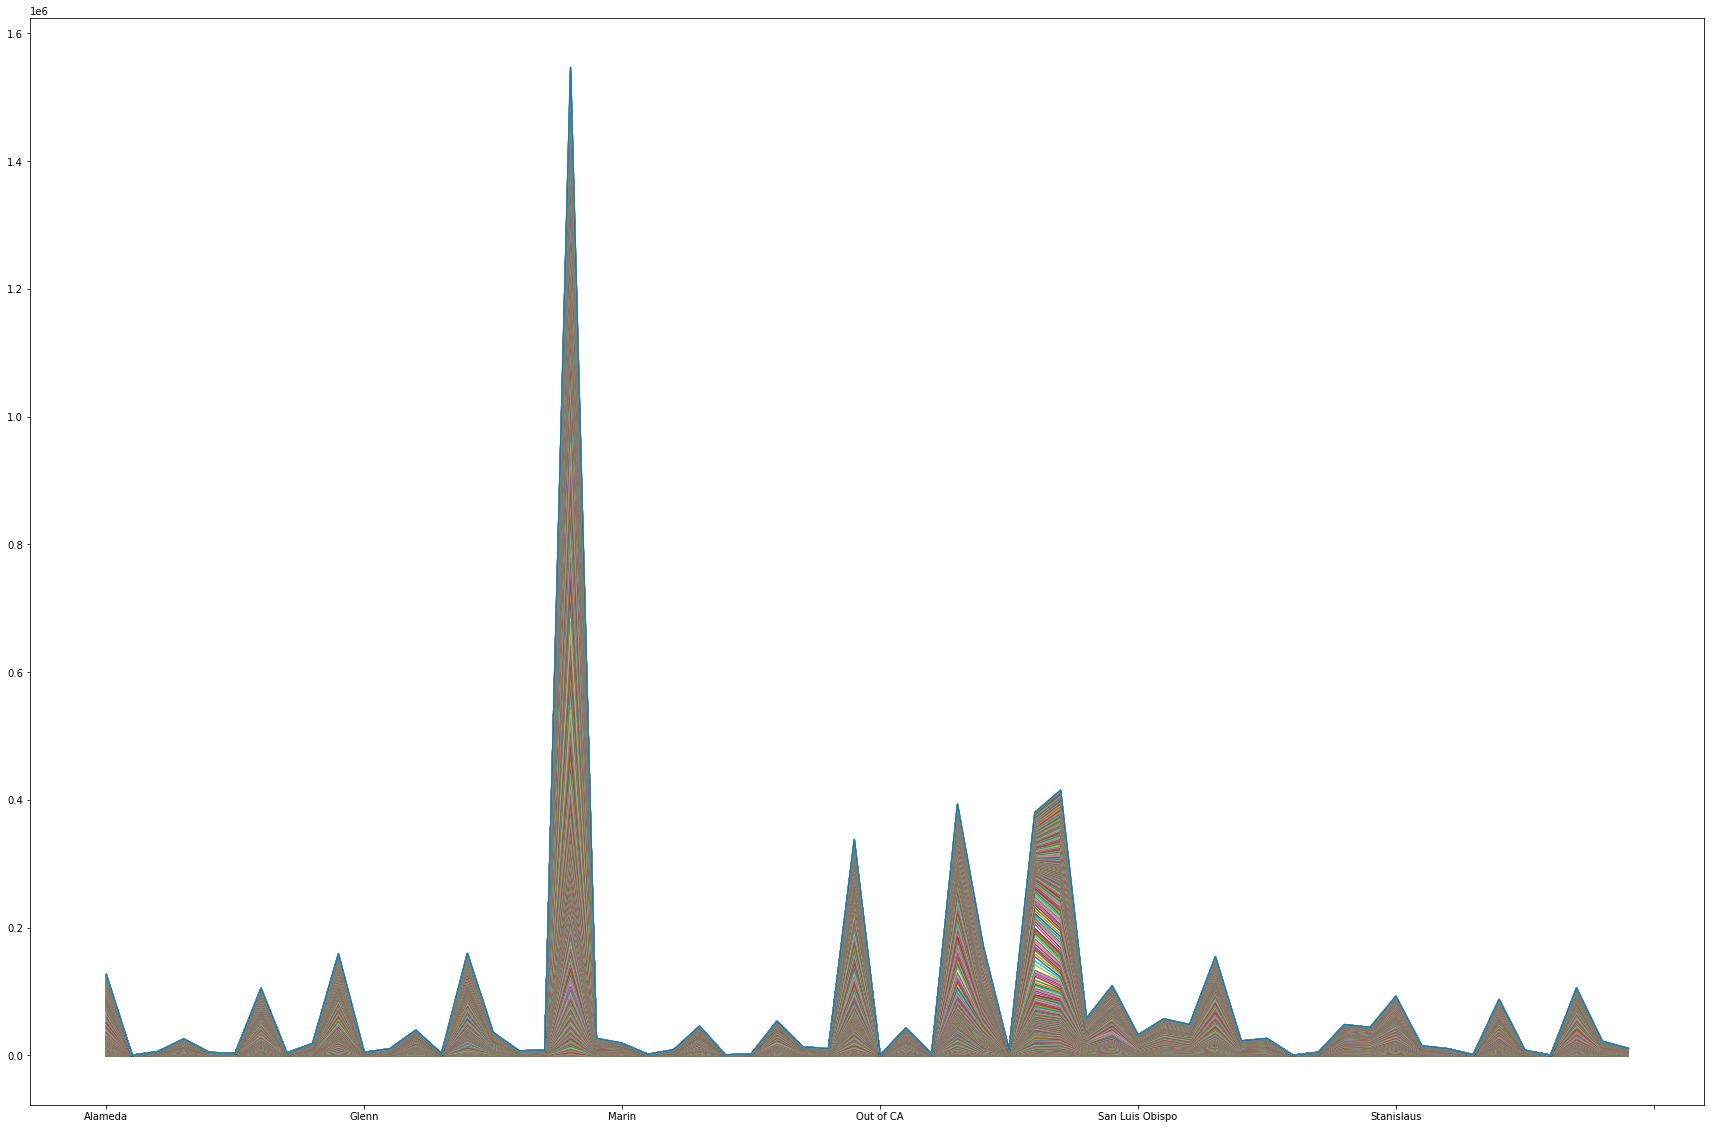

In [21]:
dframe_Cal.plot(figsize=(30,20),legend=False)

<AxesSubplot:>

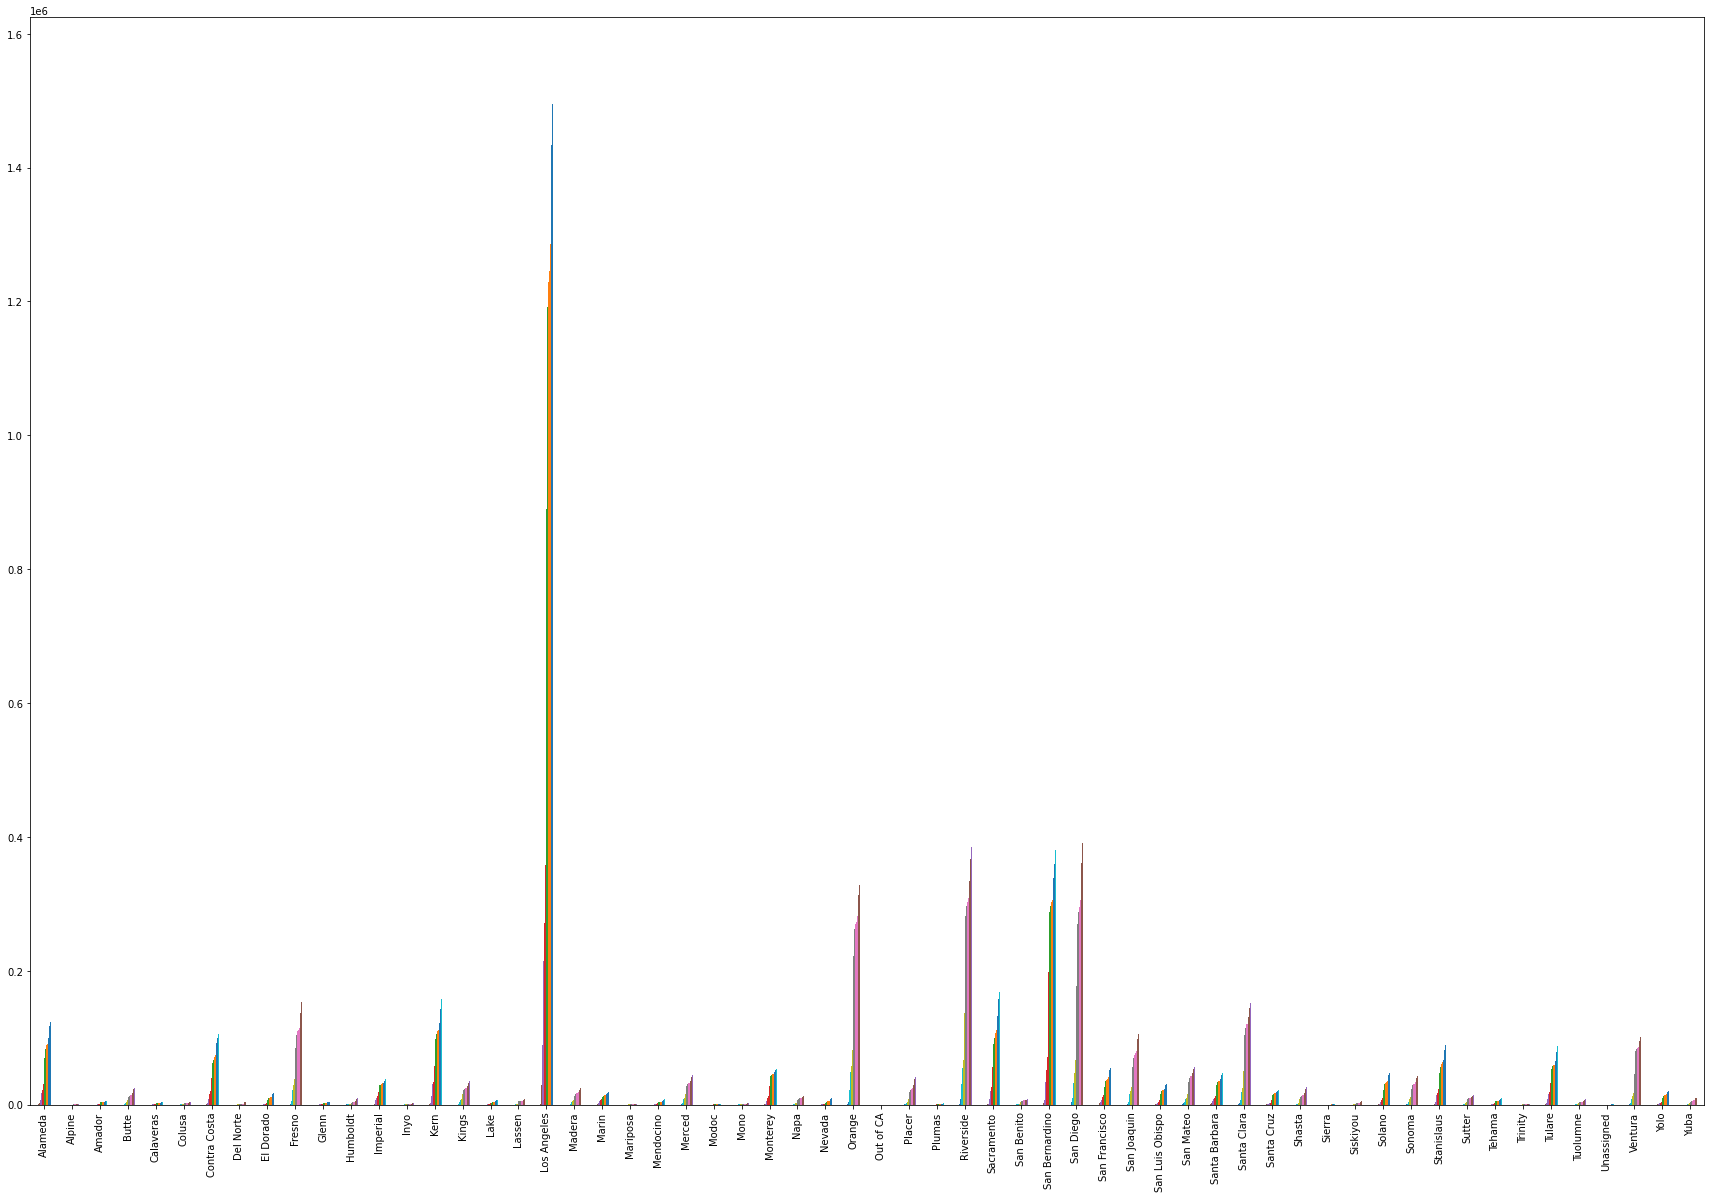

In [22]:
dframe_Cal.plot.bar(figsize=(30,20),legend=False)

**Cases in CA are as follows**

LA is the worst by a factor of almost four!

Second tier would be Riverside, San Diego, San Bernadino and Orange county.  (high populations in SoCal)

Alameda, Conta Costa and Santa Clara along with Fresno are in the third tier (high populations in NorCal)

I should look at this per capita and see how it works via population density.  I'm pretty sure LA county is the largest in the state so no surprise.  SF is a small but dense population, that could be why it's so low, also SF has had very strict policies and good general adherance to them.

In [23]:
dframe_Cal.describe()

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12
count,60.0,60.0,60.0,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,0.0,0.0,0.0,0.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.050000,...,8.509545e+04,8.513582e+04,8.538563e+04,8.550552e+04,8.558092e+04,8.571312e+04,8.577952e+04,8.589057e+04,8.592055e+04,8.594487e+04
std,0.0,0.0,0.0,0.0,0.181020,0.181020,0.181020,0.181020,0.181020,0.219784,...,2.132141e+05,2.134778e+05,2.137675e+05,2.139732e+05,2.141151e+05,2.144328e+05,2.146554e+05,2.149241e+05,2.151310e+05,2.152988e+05
min,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.553250e+03,5.553500e+03,5.580500e+03,5.587250e+03,5.595750e+03,5.598750e+03,5.598750e+03,5.604000e+03,5.604000e+03,5.604000e+03
50%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.207600e+04,2.207750e+04,2.218300e+04,2.221550e+04,2.224300e+04,2.225650e+04,2.225650e+04,2.229900e+04,2.229900e+04,2.229900e+04
75%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.461300e+04,6.462125e+04,6.492525e+04,6.498875e+04,6.507475e+04,6.513725e+04,6.513725e+04,6.520775e+04,6.520775e+04,6.520775e+04
max,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.532430e+06,1.534720e+06,1.536351e+06,1.537450e+06,1.538451e+06,1.540200e+06,1.541886e+06,1.543784e+06,1.545583e+06,1.547042e+06


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

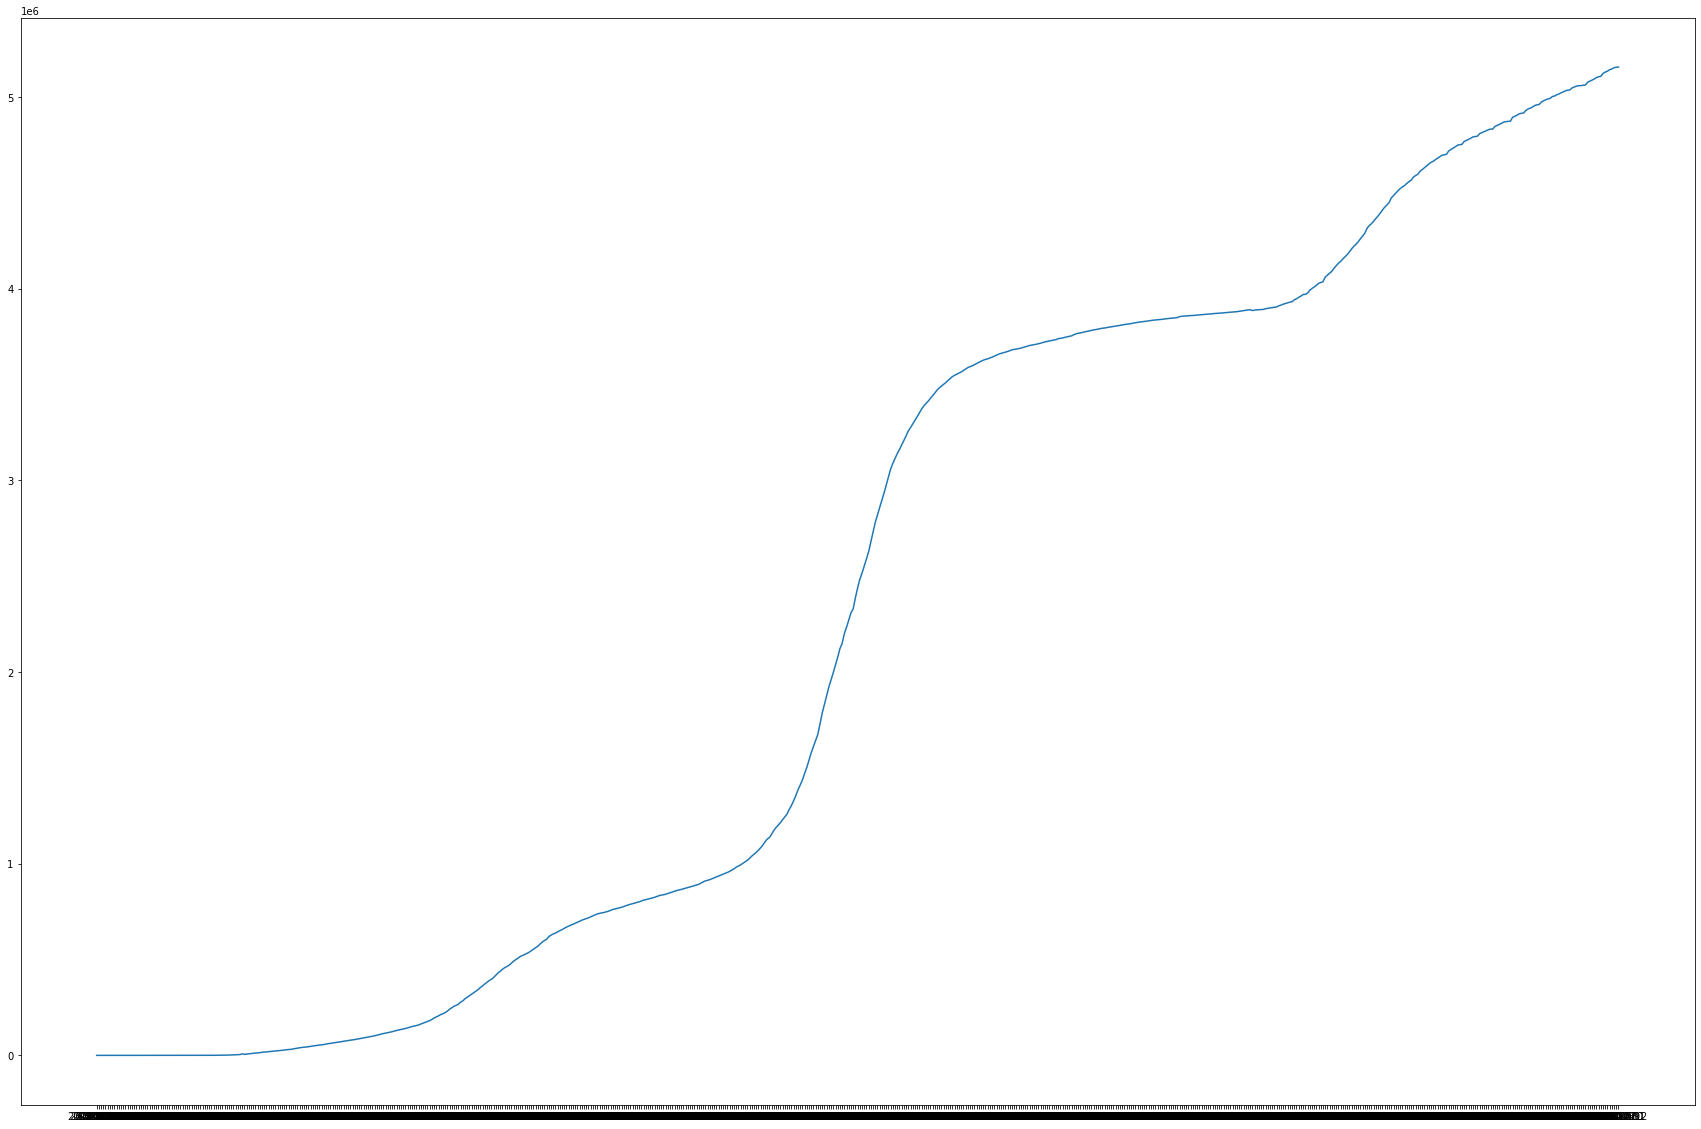

In [36]:
plt.figure(figsize=(30,20))
plt.plot(dframe_Cal.sum())

<AxesSubplot:xlabel='Date'>

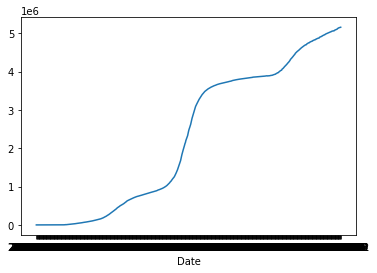

In [40]:
sns.lineplot(data=dframe_Cal.sum())

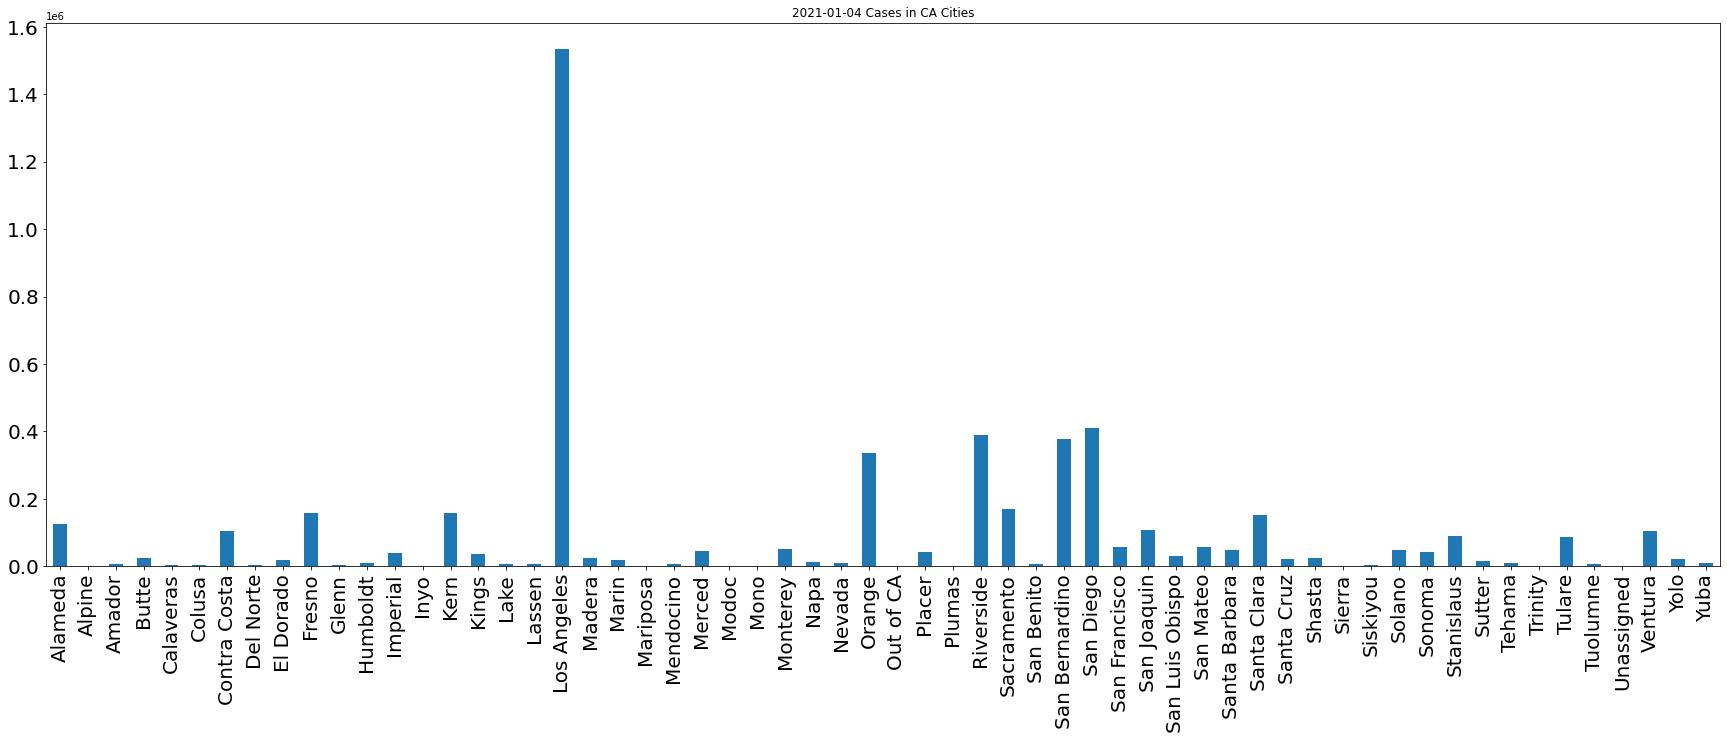

In [41]:
fig_1=dframe_Cal['2021-12-04'].plot.bar(title='2021-01-04 Cases in CA Cities',figsize=(30,10),fontsize=20)

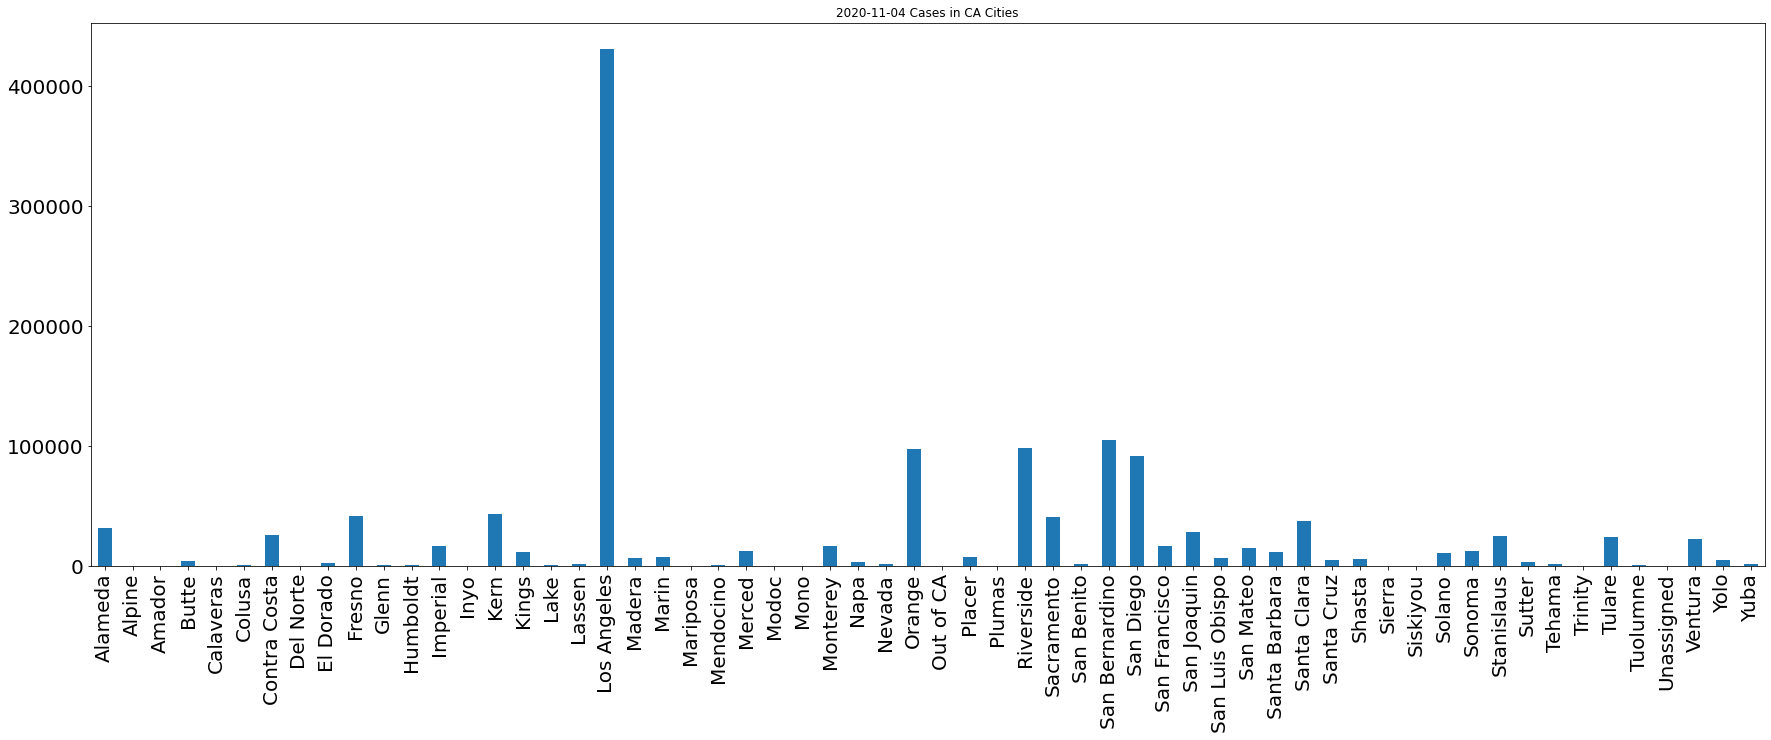

In [42]:
fig_2=dframe_Cal['2020-12-04'].plot.bar(title='2020-11-04 Cases in CA Cities',figsize=(30,10),fontsize=20)

<AxesSubplot:>

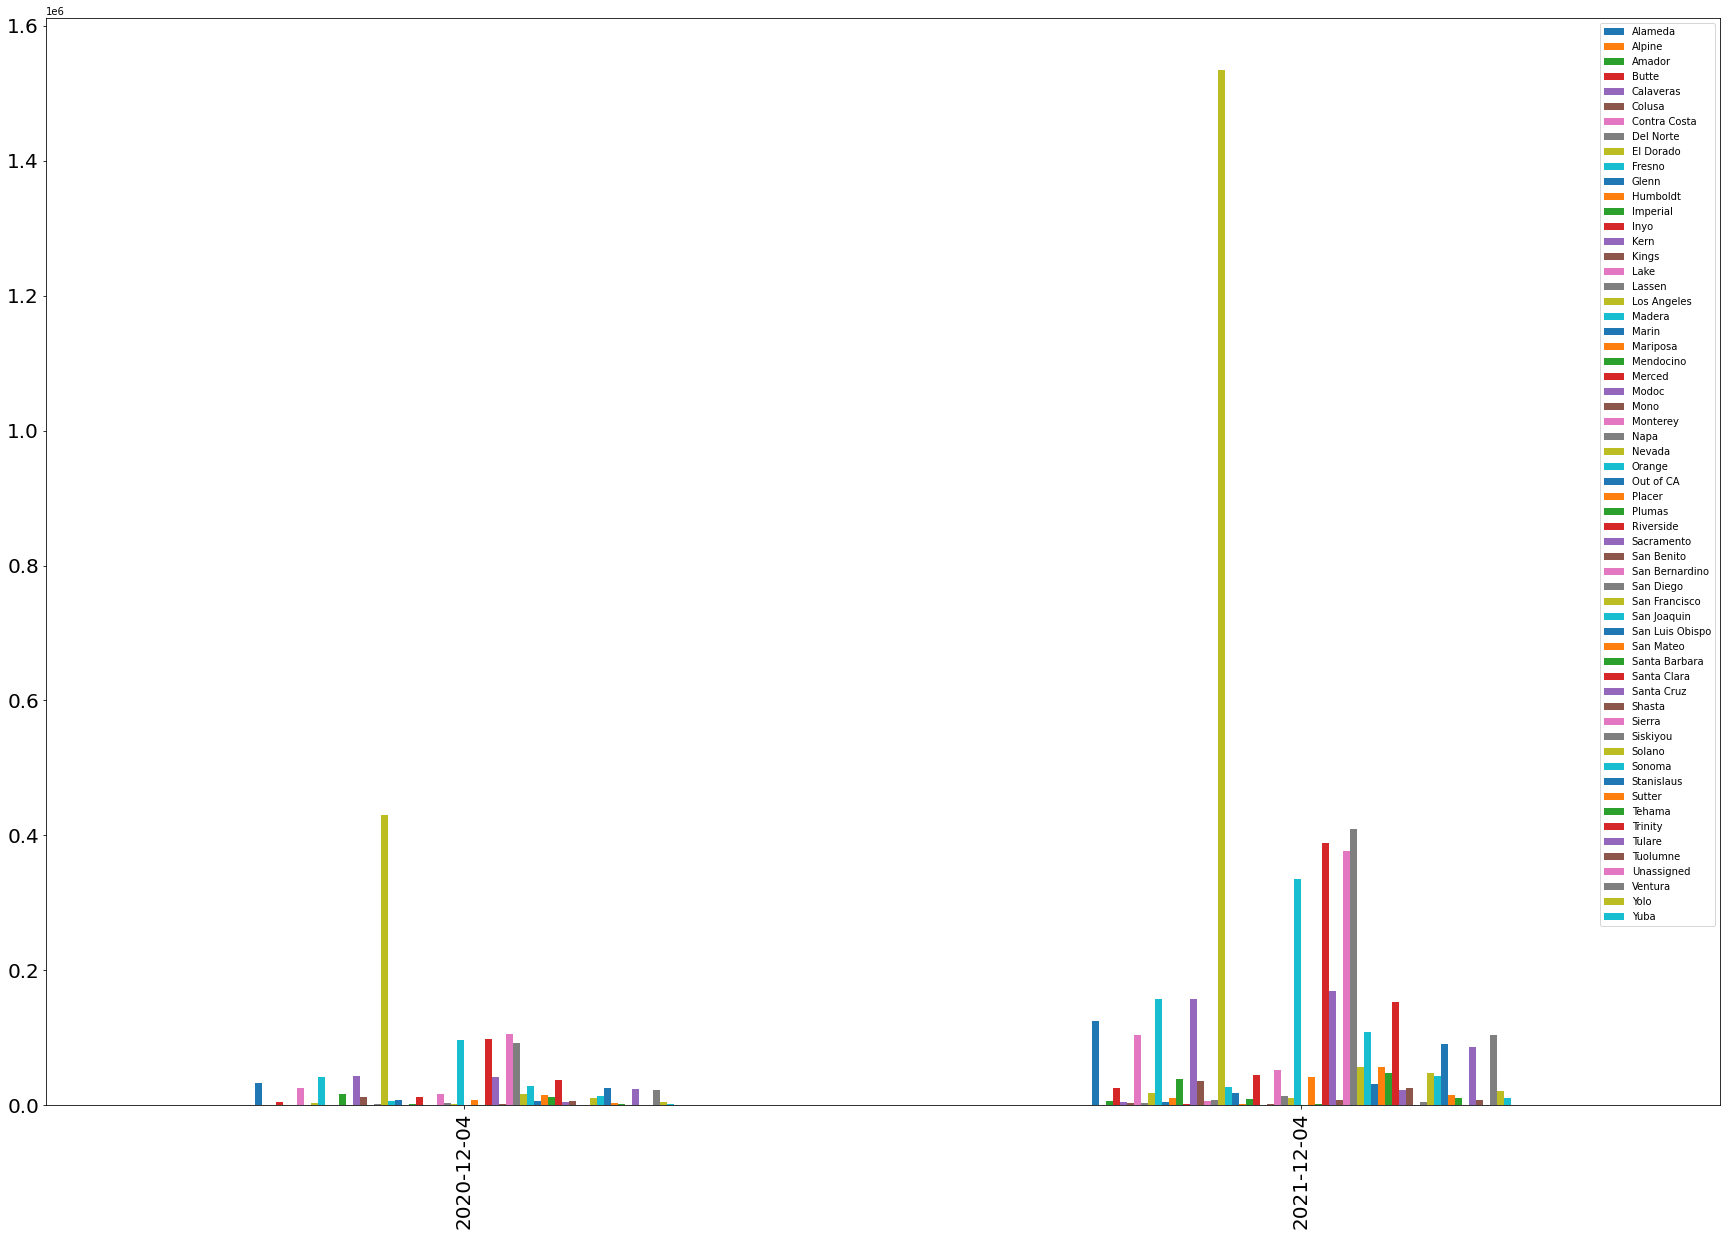

In [43]:
fig1=[dframe_Cal['2020-12-04'],dframe_Cal['2021-12-04']]
DataFrame(fig1).plot.bar(figsize=(30,20),fontsize=20)

<AxesSubplot:title={'center':'Diff 2020-12-04 to 2021-12-04 Cases in CA Cities'}>

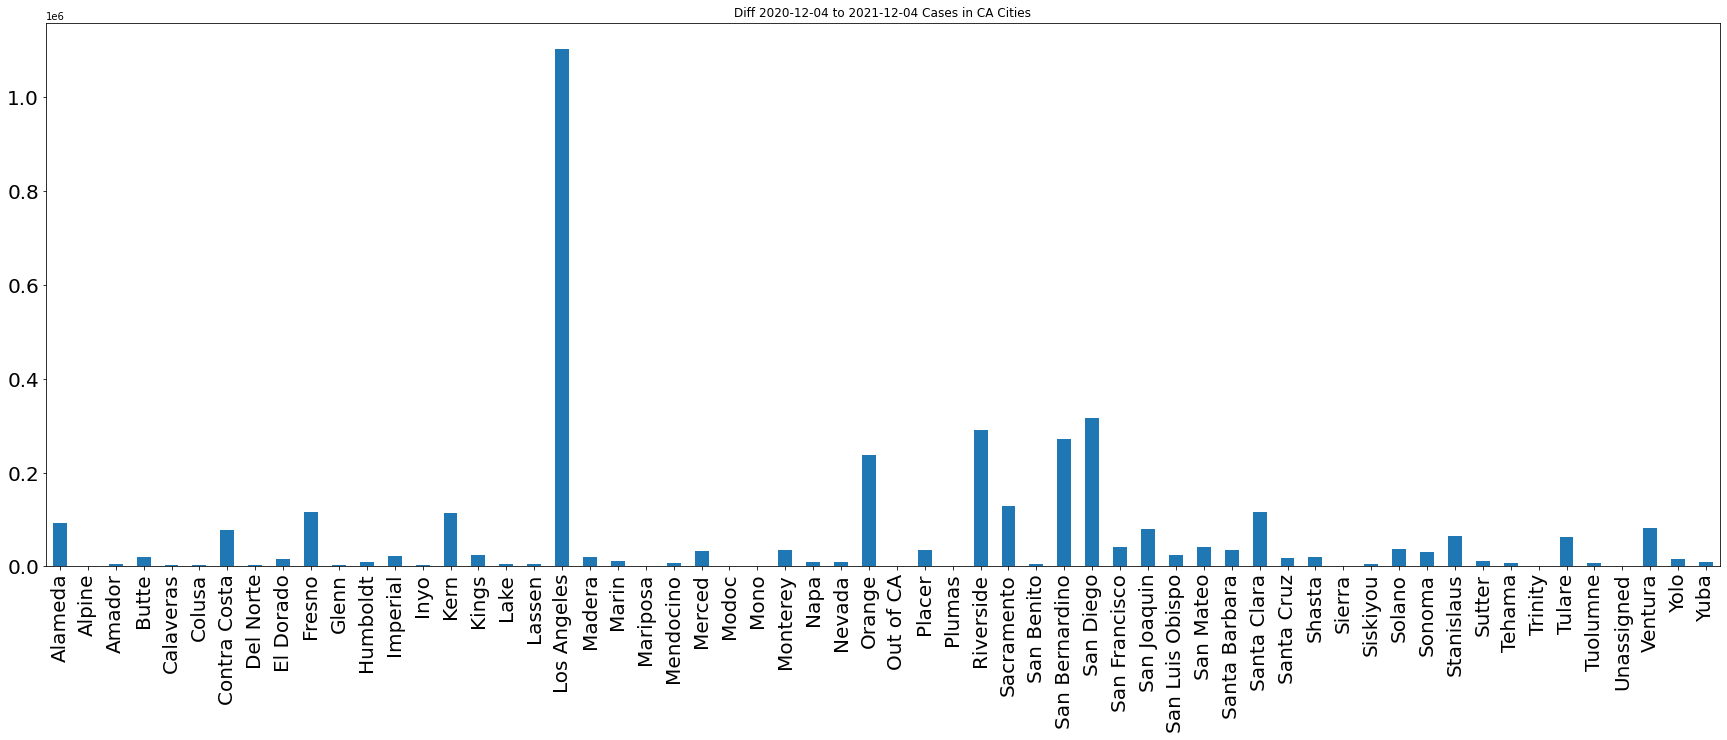

In [45]:
fig2=dframe_Cal['2021-12-04']-dframe_Cal['2020-12-04']
DataFrame(fig2).plot.bar(title='Diff 2020-12-04 to 2021-12-04 Cases in CA Cities',figsize=(30,10),legend=False,fontsize=20)

<AxesSubplot:title={'center':'Fold increase 2020-12-04 to 2021-12-04 Cases in CA Cities'}>

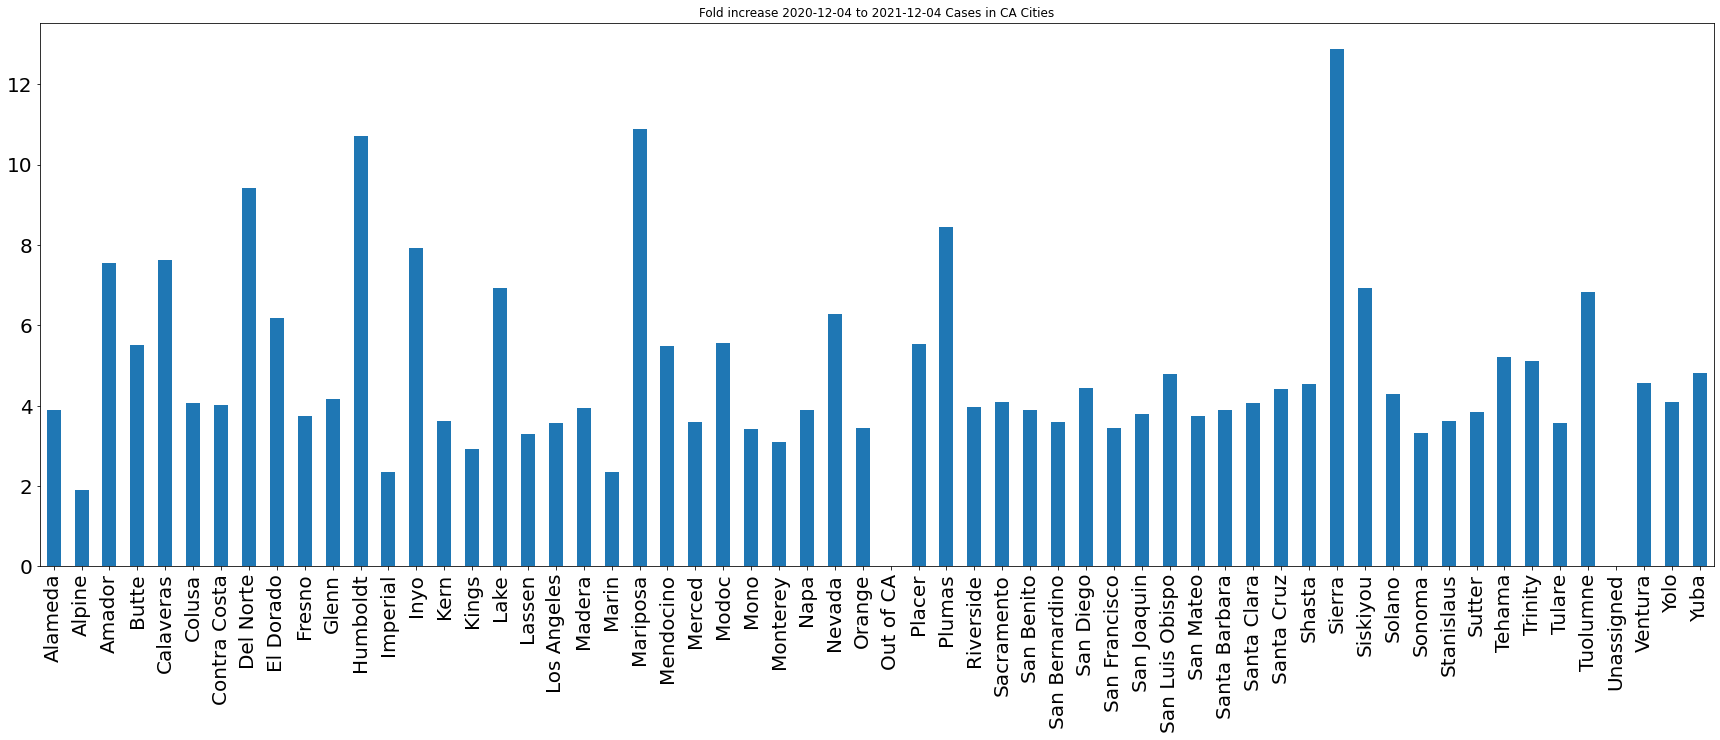

In [47]:
fig3=dframe_Cal['2021-12-04']/dframe_Cal['2020-12-04']
DataFrame(fig3).plot.bar(title='Fold increase 2020-12-04 to 2021-12-04 Cases in CA Cities',figsize=(30,10),legend=False,fontsize=20)

In [48]:
states=set(us_confirmed['Province/State'])
states

{'Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Diamond Princess',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Grand Princess',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [49]:
dates=set(us_confirmed['Date'])
dates

{'2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-

In [50]:
dframe1=DataFrame(np.arange(len(states)),states)
dframe1

,0
Kansas,0
Texas,1
Wisconsin,2
Wyoming,3
North Dakota,4
Georgia,5
Indiana,6
Florida,7
Puerto Rico,8
Hawaii,9


In [51]:
dframe2=DataFrame(np.arange(len(dates)),dates)
dframe2

,0
2021-09-30,0
2021-09-24,1
2020-08-15,2
2021-07-26,3
2020-07-06,4
...,...
2020-01-29,686
2020-06-29,687
2020-11-24,688
2021-02-22,689


In [52]:
us_confirmed.columns

Index(['Unnamed: 0', 'Admin2', 'Date', 'Case', 'Country/Region',
       'Province/State'],
      dtype='object')

In [53]:
States_confirmed=[]
for state in states:
    States_confirmed.append (us_confirmed[us_confirmed['Province/State']==state])
States_confirmed

[        Unnamed: 0     Admin2        Date   Case Country/Region Province/State
 639866      639866      Allen  2020-01-22      0             US         Kansas
 639867      639867      Allen  2020-01-23      0             US         Kansas
 639868      639868      Allen  2020-01-24      0             US         Kansas
 639869      639869      Allen  2020-01-25      0             US         Kansas
 639870      639870      Allen  2020-01-26      0             US         Kansas
 ...            ...        ...         ...    ...            ...            ...
 713798      713798  Wyandotte  2021-12-08  29763             US         Kansas
 713799      713799  Wyandotte  2021-12-09  29763             US         Kansas
 713800      713800  Wyandotte  2021-12-10  29979             US         Kansas
 713801      713801  Wyandotte  2021-12-11  29979             US         Kansas
 713802      713802  Wyandotte  2021-12-12  29979             US         Kansas
 
 [73937 rows x 6 columns],
          U

In [124]:
#Separate each city (aka Admin2) as a different column and show the cases by date
Flor=us_confirmed[us_confirmed['Province/State']=='Florida']
dframe6=Flor.set_index(['Admin2','Date']).unstack('Admin2')['Case']
dframe6

Admin2,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Lucie,Sumter,Suwannee,Taylor,Unassigned,Union,Volusia,Wakulla,Walton,Washington
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08,40476,6029,32833,5366,82584,364555,3017,23859,20841,34166,...,48403,14918,9309,4624,2961,3082,78132,6487,12979,4595
2021-12-09,40476,6029,32833,5366,82584,364555,3017,23859,20841,34166,...,48403,14918,9309,4624,2961,3082,78132,6487,12979,4595
2021-12-10,40637,6042,32885,5369,82881,366003,3017,23977,20892,34257,...,48518,14974,9326,4642,2961,3089,78488,6495,13003,4610


<AxesSubplot:title={'center':'Florida cases by county'}, xlabel='Date'>

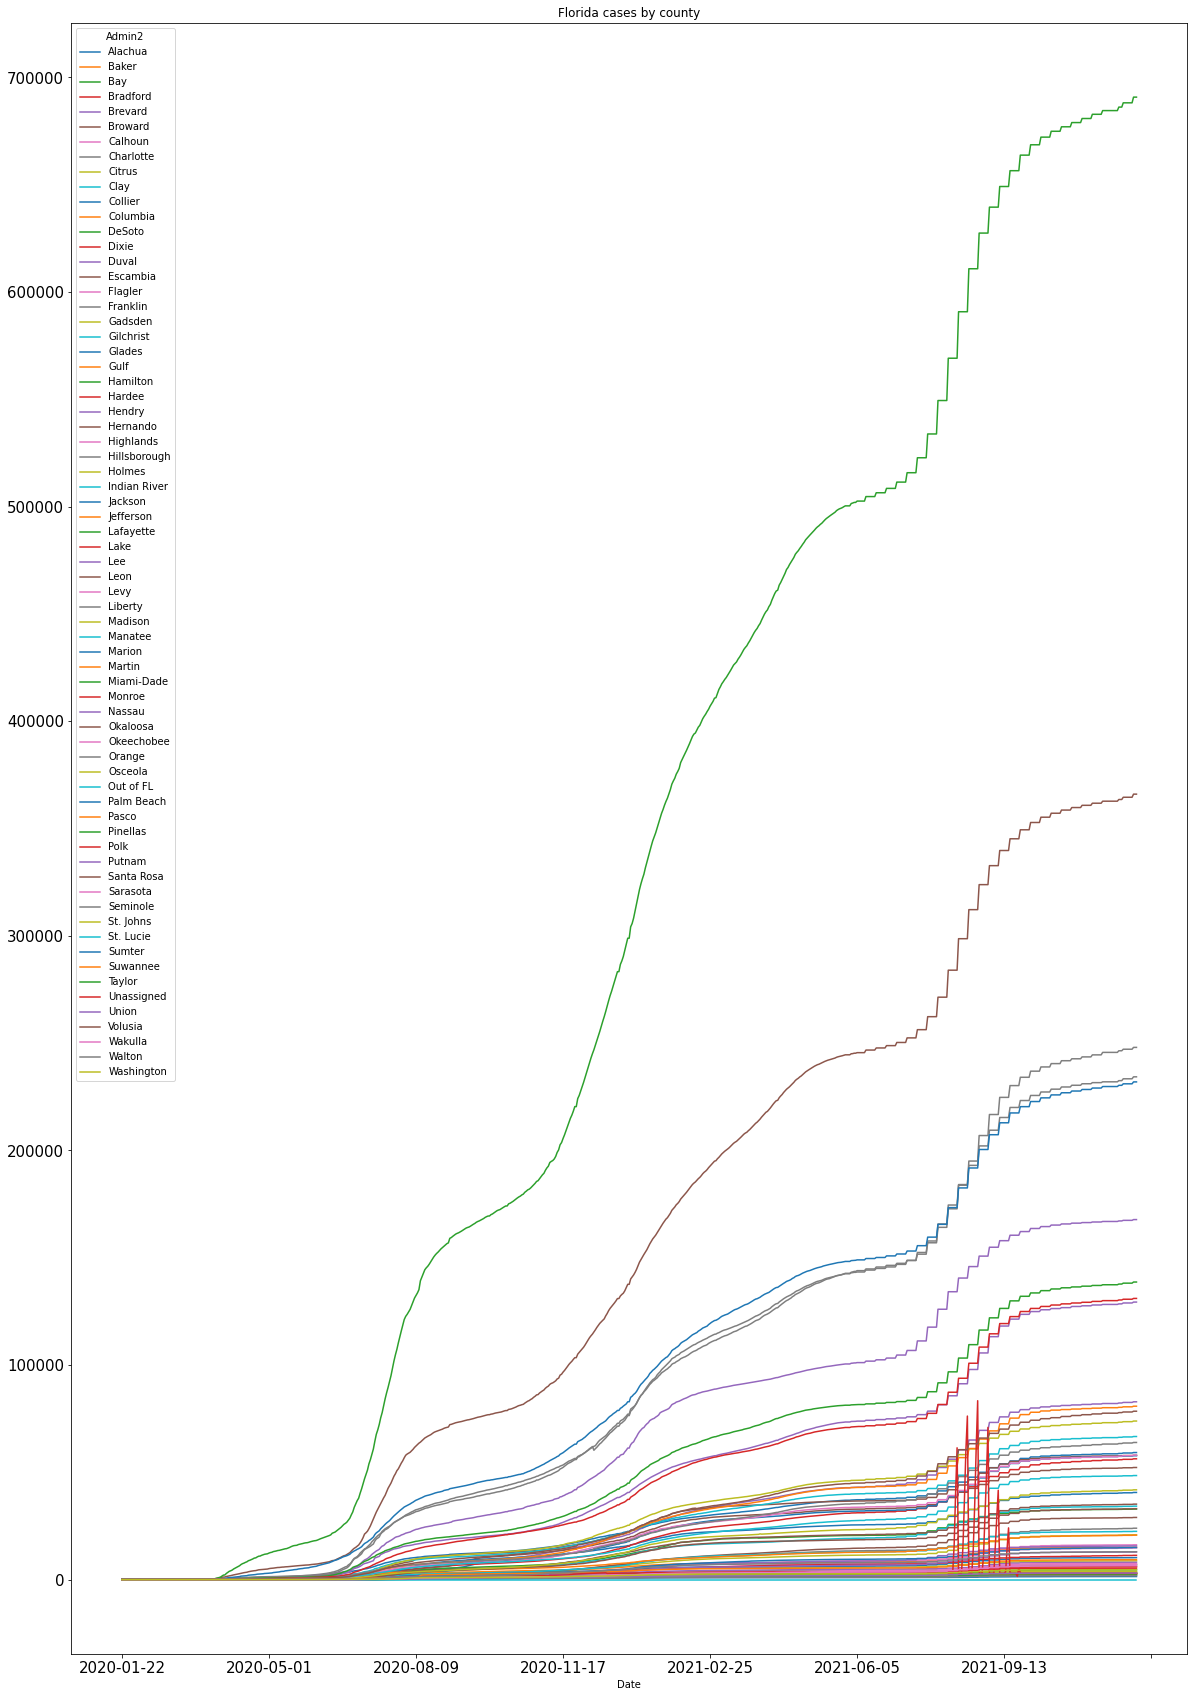

In [125]:
dframe6.plot(title=('Florida cases by county'),figsize=(20,30),fontsize=15)

In [126]:
# Pivot the DF so it's by dae instead of by county
Florida_Cities=[]
for i in dframe6.columns:
    Florida_Cities.append(dframe6[i])
dframe_Flor=DataFrame(Florida_Cities)  

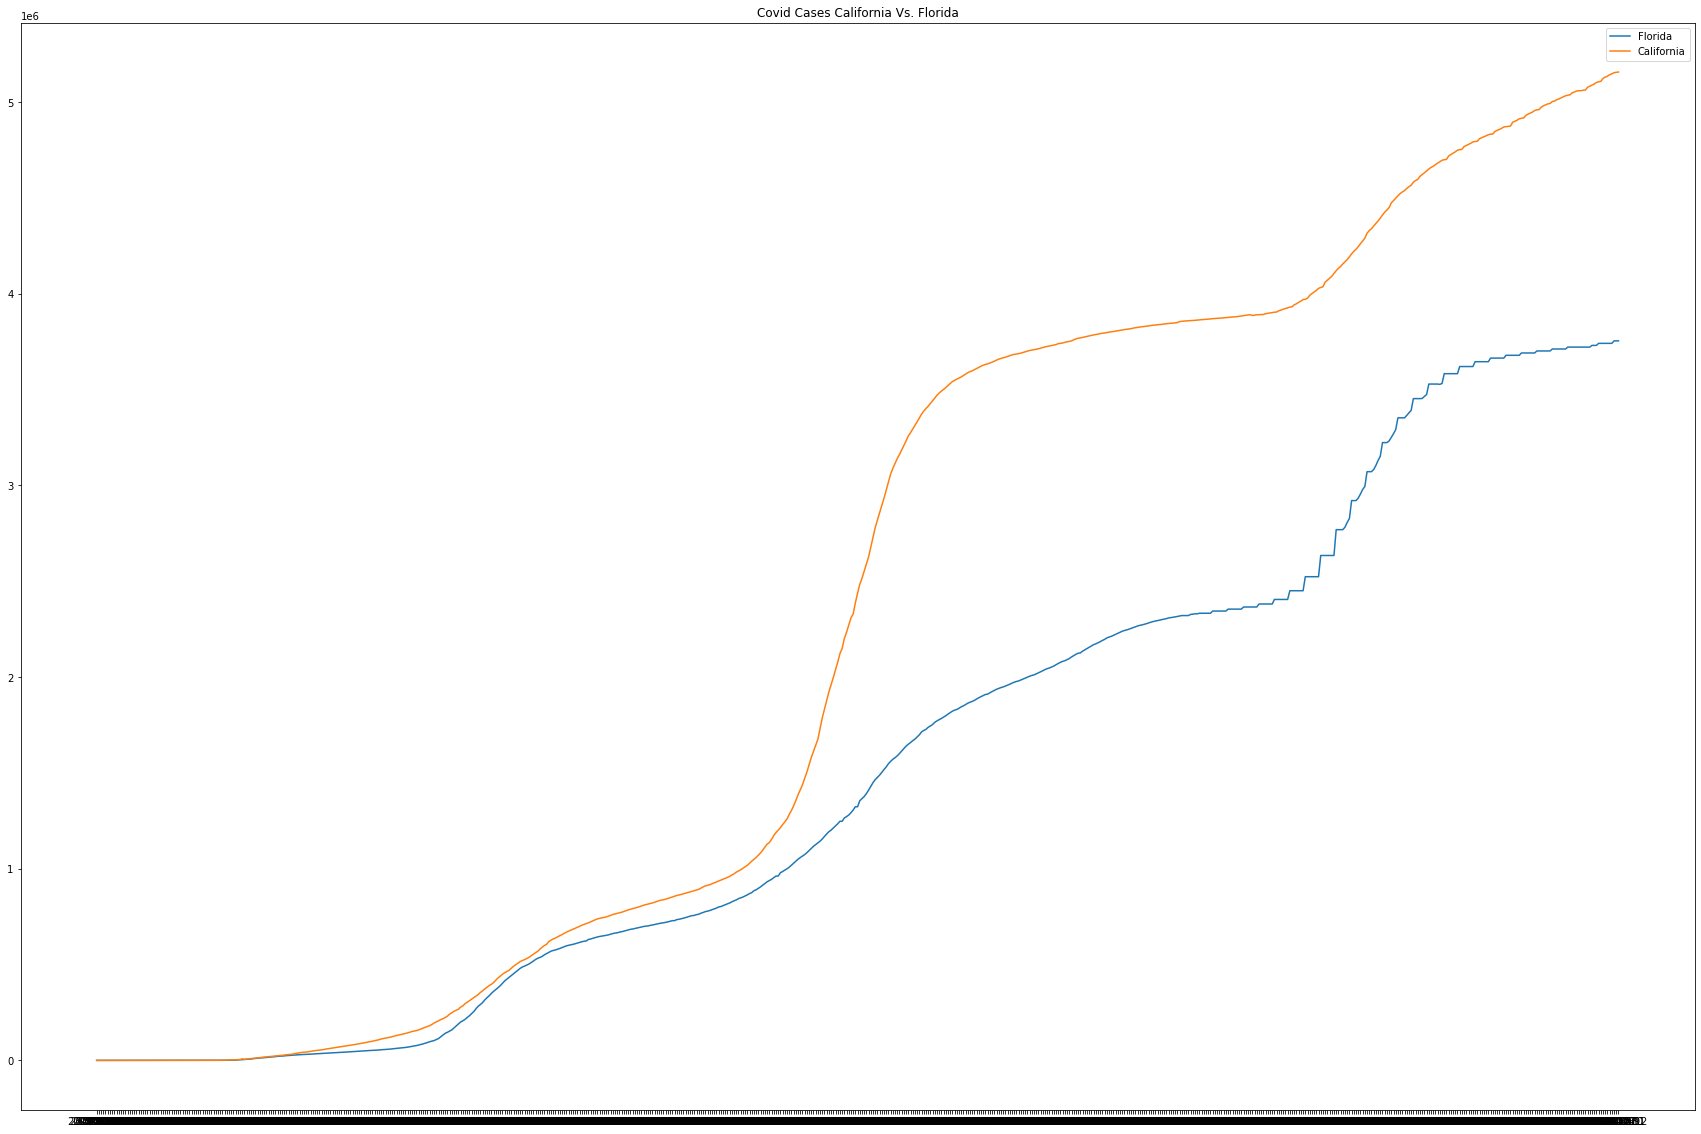

In [130]:
_= plt.figure(figsize=(30,20))
_= plt.title("Covid Cases California Vs. Florida")
_= plt.plot(dframe_Flor.sum(), label='Florida')
_= plt.plot(dframe_Cal.sum(), label='California')
#_= plt.xticks(range(0,len(dframe_Flor),7),rotation=90) # doesn't work for this graph?
_= plt.legend()
plt.show()

In [80]:
# Populations per 1000 residents
Cal_pop=39538.223
Flor_pop=21538.187

In [88]:
# per capita calculations for covid cases per 1000 residents
Cal_sum=dframe_Cal.sum()
Flor_sum=dframe_Flor.sum()

Cal_per_Cap = Cal_sum.div(39538.223)
Flor_per_Cap = Flor_sum.div(21538.187)


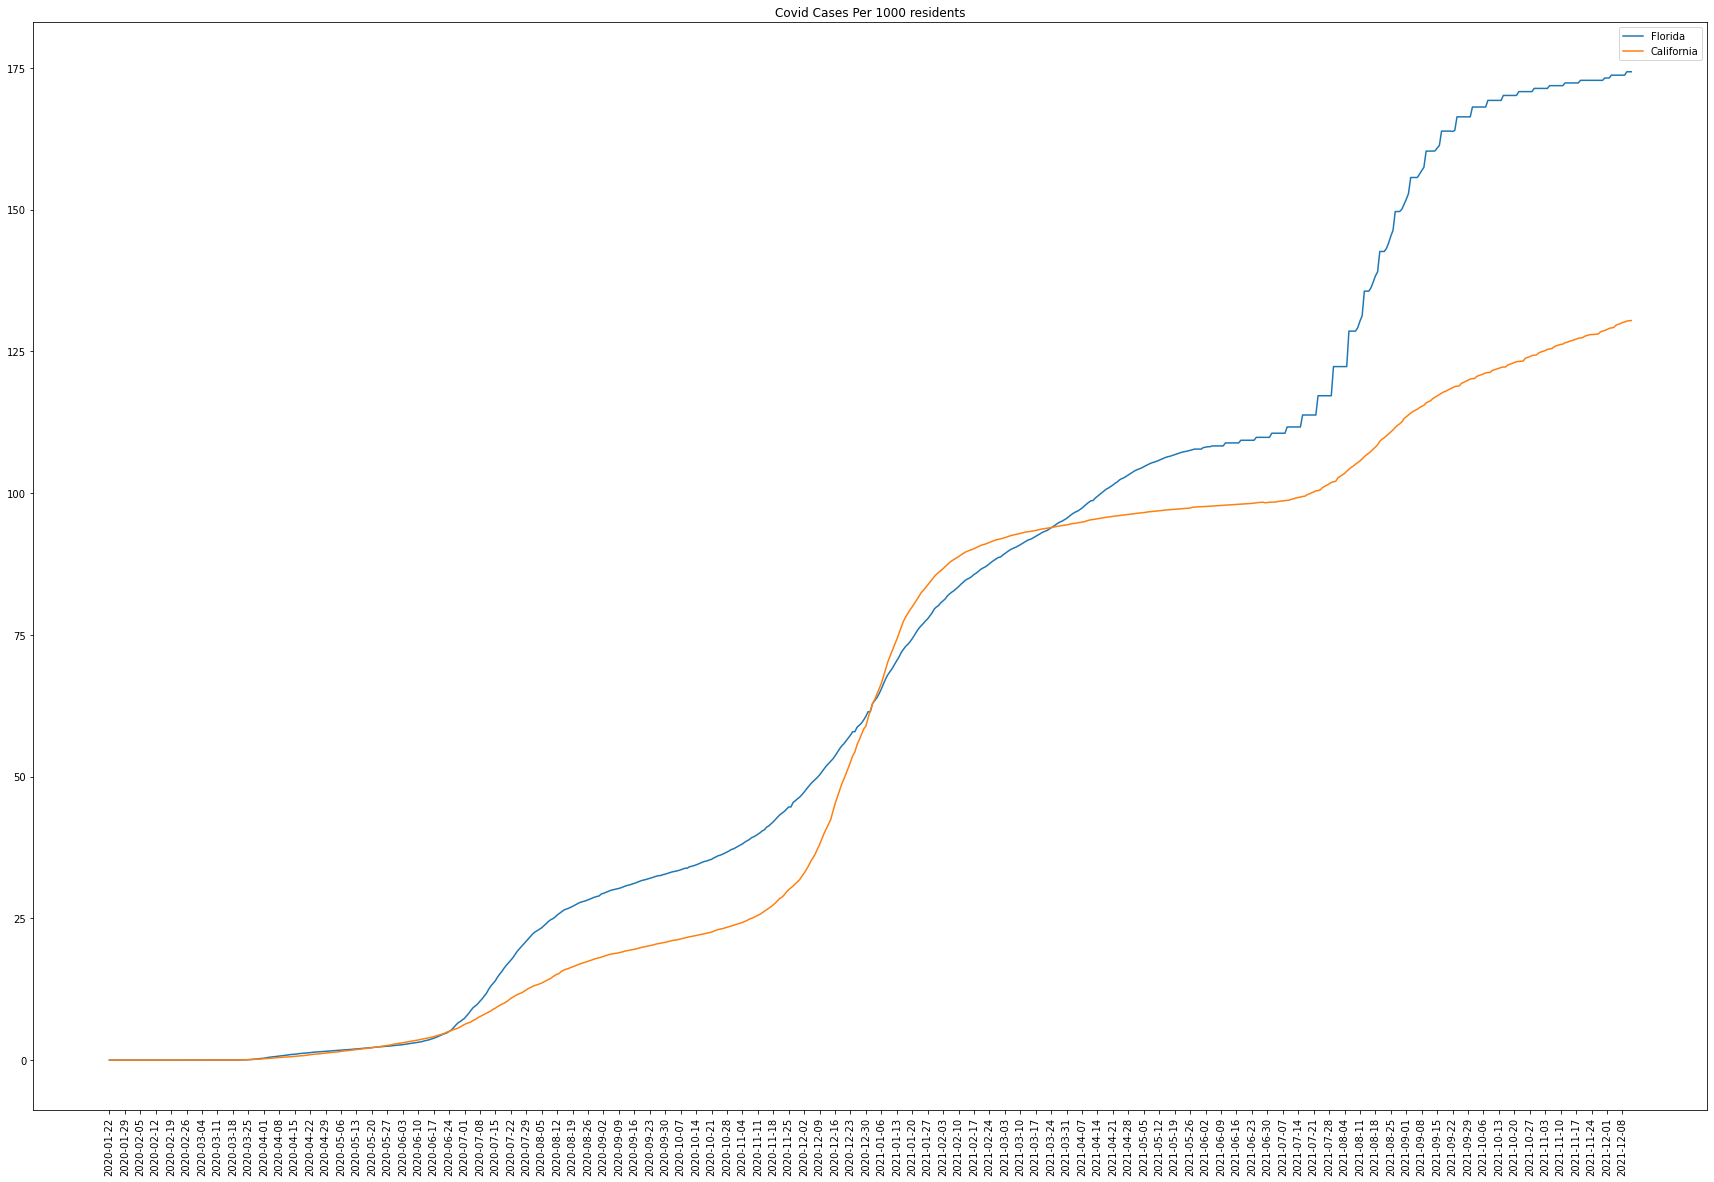

In [104]:
_= plt.figure(figsize=(30,20))
_= plt.title("Covid Cases Per 1000 residents")
_= plt.plot(Flor_per_Cap, label='Florida')
_= plt.plot(Cal_per_Cap, label='California')
__= plt.xticks(range(0,len(Flor_per_Cap),7),rotation=90)
_= plt.legend()
plt.show()

In [119]:
# What about deaths?
us_deaths = pd.read_csv('us_deaths.csv')
# Gets the data from California & Florida only
Cal_deaths=us_deaths[us_deaths['Province/State']=='California']
Flor_deaths=us_deaths[us_deaths['Province/State']=='Florida']
# Indexes the data by Admin2 (aka cities) and Dates
#This unstacks the cities into their own hirerarchy
dframe7=Cal_deaths.set_index(['Admin2','Date']).unstack('Admin2')['Case']
dframe8=Flor_deaths.set_index(['Admin2','Date']).unstack('Admin2')['Case']

In [120]:
#If I'm going to do this a bunch might as well make a function to get the city data from the dataframe
def cities(dataframe):
    Cities=[]
    for i in dataframe.columns:
        Cities.append(dataframe[i])
    return DataFrame(Cities)  

In [139]:
Cal_Cities_Deaths=cities(dframe7)
Flor_Cities_Deaths=cities(dframe8)
Cal_deaths_per_1k = Cal_Cities_Deaths.div(39538.223)
Flor_deaths_per_1k = Flor_Cities_Deaths.div(21538.187)

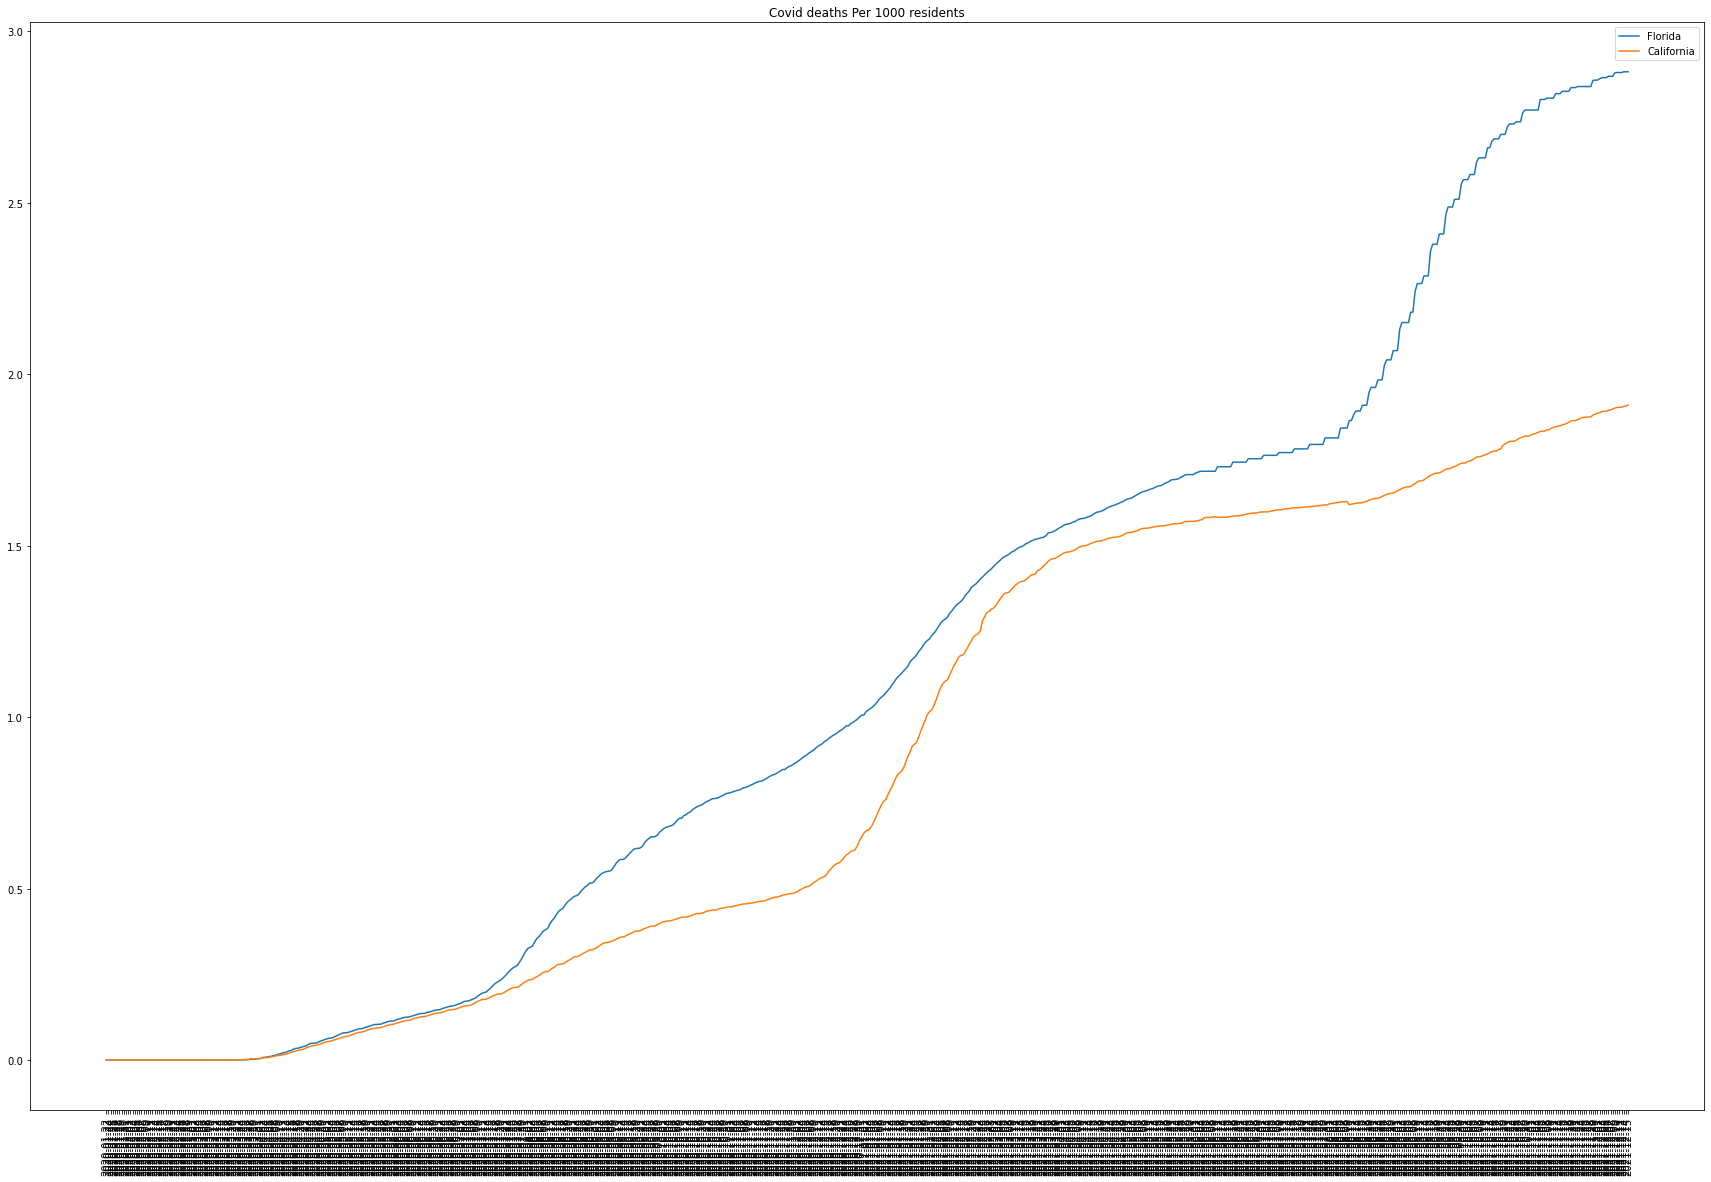

In [142]:
__= plt.figure(figsize=(30,20))
__= plt.title("Covid deaths Per 1000 residents")
__= plt.plot(Flor_deaths_per_1k.sum(), label='Florida')
__= plt.plot(Cal_deaths_per_1k.sum(), label='California')
__= plt.xticks(rotation=90)
__= plt.legend()
plt.show()

In [ ]:
# Why do cases and deaths per 1k residents look the same?  Something is wrong in my calculations
# It appears that all the .csv files are the same?
# Something happened with my import of the data

In [149]:
# What about deaths?
simplified = pd.read_csv('us_simplified.csv')
# Gets the data from California & Florida only
Cal_deaths=simplified[simplified['Province/State']=='California']
Flor_deaths=simplified[simplified['Province/State']=='Florida']
# make a new column of % deaths by cases
Cal_deaths['Mortality']=(Cal_deaths['Deaths']/Cal_deaths['Confirmed'])*100
Flor_deaths['Mortality']=(Flor_deaths['Deaths']/Flor_deaths['Confirmed'])*100

# Indexes the data by Admin2 (aka cities) and Dates
#This unstacks the cities into their own hirerarchy
#dframe9=Cal_deaths.set_index(['Admin2','Date']).unstack('Admin2')['Mortality']
#dframe10=Flor_deaths.set_index(['Admin2','Date']).unstack('Admin2')['Mortality']

<ipython-input-149-59059c93f8e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cal_deaths['Mortality']=(Cal_deaths['Deaths']/Cal_deaths['Confirmed'])*100
<ipython-input-149-59059c93f8e3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flor_deaths['Mortality']=(Flor_deaths['Deaths']/Flor_deaths['Confirmed'])*100


In [151]:
Cal_deaths.describe()

,Unnamed: 0,Confirmed,Deaths,Mortality
count,41640.000000,4.164000e+04,41640.000000,3.734000e+04
mean,157537.500000,3.848884e+04,580.004683,inf
std,12020.576941,1.328731e+05,2337.073876,NaN
min,136718.000000,0.000000e+00,0.000000,0.000000e+00
25%,147127.750000,1.580000e+02,1.000000,6.726141e-01
50%,157537.500000,3.678500e+03,43.000000,1.143508e+00
75%,167947.250000,2.357850e+04,273.000000,1.518908e+00
max,178357.000000,1.551117e+06,27369.000000,inf


In [152]:
Flor_deaths.describe()

,Unnamed: 0,Confirmed,Deaths,Mortality
count,47886.000000,47886.000000,47886.000000,4.319600e+04
mean,261290.500000,22062.684626,354.281251,inf
std,13823.641832,59956.989446,1189.401108,NaN
min,237348.000000,0.000000,0.000000,0.000000e+00
25%,249319.250000,629.250000,9.000000,1.090614e+00
50%,261290.500000,3351.000000,56.000000,1.576577e+00
75%,273261.750000,16654.000000,326.000000,2.271547e+00
max,285233.000000,690766.000000,25101.000000,inf


In [153]:
print('California maxamum mortality',(27369/1551117)*100,"%")
print("Florida's maxamum mortality",(25101/690766)*100,"%")

California maxamum mortality 1.7644703784434057 %
Florida's maxamum mortality 3.633792051143224 %


In [162]:
Flor_deaths[Flor_deaths["Date"]=='2021-12-15'].sum()

Unnamed: 0                                                 18052953
Date              2021-12-152021-12-152021-12-152021-12-152021-1...
Admin2            AlachuaBakerBayBradfordBrevardBrowardCalhounCh...
Province/State    FloridaFloridaFloridaFloridaFloridaFloridaFlor...
Confirmed                                                   3754042
Deaths                                                        62074
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Mortality                                                924.213211
dtype: object

In [163]:
print("Mortality Rate for Florida 12/15/21 was ",(62074/3754042)*100,"%")

Mortality Rate for Florida 12/15/21 was  1.6535243878464865 %


In [164]:
Cal_deaths[Cal_deaths["Date"]=='2021-12-15'].sum()

Unnamed: 0                                                  9473040
Date              2021-12-152021-12-152021-12-152021-12-152021-1...
Admin2            AlamedaAlpineAmadorButteCalaverasColusaContra ...
Province/State    CaliforniaCaliforniaCaliforniaCaliforniaCalifo...
Confirmed                                                   5182686
Deaths                                                        75517
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Mortality                                                 67.318309
dtype: object

In [165]:
print("Mortality Rate for California 12/15/21 was ",(75517/5182686)*100,"%")

Mortality Rate for California 12/15/21 was  1.457101587863899 %


**not a very big difference.**

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='Date', ylabel='Mortality'>

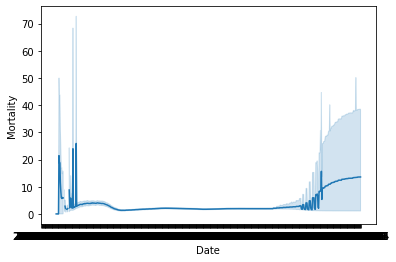

In [166]:
sns.lineplot(data=Flor_deaths,x='Date',y='Mortality')

**Mortality rates in Florida have certainly gotten really high at times**

Currenlty you are 5X more likeley to die of COVID in Florida than in California.  Not enough Hospital beeds or too few vaccinated individuals?

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='Date', ylabel='Mortality'>

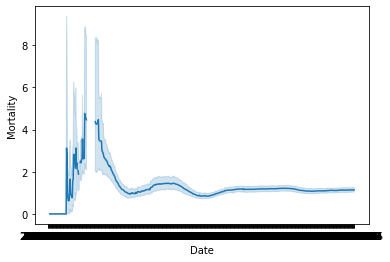

In [167]:
sns.lineplot(data=Cal_deaths,x='Date',y='Mortality')

**California has had almost 9% mortality at times, but is below 2% for most of COVID**

In [114]:
# Concatinate all the different states (which were seperated) Into one DataFrame
# how is this different if I made the DataFrame frome the start?
dframe9=pd.concat(States_confirmed)
dframe9

,Unnamed: 0,Admin2,Date,Case,Country/Region,Province/State
639866,639866,Allen,2020-01-22,0,US,Kansas
639867,639867,Allen,2020-01-23,0,US,Kansas
639868,639868,Allen,2020-01-24,0,US,Kansas
639869,639869,Allen,2020-01-25,0,US,Kansas
639870,639870,Allen,2020-01-26,0,US,Kansas
...,...,...,...,...,...,...
885857,885857,Worcester,2021-12-08,109632,US,Massachusetts
885858,885858,Worcester,2021-12-09,110427,US,Massachusetts
885859,885859,Worcester,2021-12-10,111102,US,Massachusetts
885860,885860,Worcester,2021-12-11,111102,US,Massachusetts


In [ ]:
dframe10=DataFrame(us_confirmed)
dframe10

In [ ]:
dframe9.sort_values(['Province/State','Admin2'])

In [ ]:
dframe9==dframe10

In [ ]:
#Well can't compare them that way, but they look identical... So much time wasted?

In [ ]:
# Lets setup a hirearchy of indexes that I wish to look at.
# Maybe if I arrange the data in a hirearchy then I can have the data arranged by each of these sub headings
dframe11=DataFrame(index=list(dates), columns=[['Country/Region'],['Province/State'],['County'],['Case']])
dframe11.index.name='Date'
dframe11

In [ ]:
# Now how do I fit my data into this hirearchy?

In [ ]:
dframe11.merge(dframe11,dframe9, on='Date',how='inner')

In [ ]:
dframe6['Adams']

In [ ]:
ser = pd.Series(np.random.randn(6),index=[['US','US','US','US','US','US'],
                                          ['Indiana','Indiana','Indiana','Indiana','Indiana','Indiana'],
                                          ['Adams','Adams','Adams','Allan','Allan','Allan'],
                                         ['2020-01-22','2020-01-23','2020-01-24','2020-01-22','2020-01-23','2020-01-24']])
ser

In [ ]:
DataFrame(ser)

In [ ]:
# Here I am trying to make a dataframe with the index hirearchy but importing the case data into the data
ser1 =pd.Series(dframe10['Case'],index=[dframe10['Country/Region'],dframe10['Province/State'],dframe10['Admin2'],dframe10['Date']])
ser1

In [ ]:
DataFrame(ser1)
#This didn't work and I got NaN for all the data entries... Why is that?

In [ ]:
# The index hirearchy looks good but the rest doesn't

**This next section is to experiment with getting the population data frome each Country/State/County to compair two things**

**Covid cases by population of each count and covid cases by population density**

In [ ]:
import webbrowser
website ='https://worldpopulationreview.com/'
webbrowser.open(website)

In [ ]:
World_Population = pd.read_html('https://worldpopulationreview.com/')
World_Population

In [ ]:
# Okay I need to use my previous code to webscrape for these websites.  That way I 1) am showing that my webscrape class works
# and 2) I'll have this automated to grab the counties from the other states.

In [ ]:
World_pop=DataFrame(World_Population)
World_pop

In [ ]:
World_pop[0][0]

In [ ]:
CA_Population = pd.read_html('https://worldpopulationreview.com/states/california-population')
CA_Population

In [ ]:
# Wow! that is full of useful statistics we can use to look at risk factors for COVID, But it's not County Data

In [ ]:
# I'm starting to like the panda's html parser.  It's making getting some data off a website very easy.
CA_Population_County = pd.read_html('https://worldpopulationreview.com/us-counties/states/ca')
CA_Population_County

In [ ]:
# Making a data frame to hopefully merge with the COVID numbers data frame.  This way I can compare numbers vs population
# And I'll get practice doing data frame mergers.  Why is it located at [0][0] when it's the only data on that page?
CA_pop=DataFrame(CA_Population_County)[0][0]
CA_pop

In [ ]:
# Need to remove the ' County' from all the county names... or add ' County' to my Covid DataFrame